 <p style="background-color:BLUE; font-family:calibri; color:white; font-size:200%; text-align:center; border-radius:15px 50px;">Capstone Project: A Machine Learning Framework for Customer Segmentation and Purchase Behavior Prediction in E-commerce</P>

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:120%; text-align:left">

<h3 align="left"><font color=yellow
                    >Problem:</font></h3> 

In this project , we are going to deal with the purchase data of customers and the goal is to develop a robust customer segmentation model and predictive classifier that categorize customers based on their purchasing patterns, enabling personalized marketing, improved retention, and optimized inventory management for e-commerce businesses.”

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:120%; text-align:left">

<h3 align="left"><font color=yellow
                    >Objectives:</font></h3>
                    
 * To analyze customer purchasing data and identify patterns in recency, frequency, and monetary value (RFM).

 * To develop customer segmentation models using clustering techniques (K-Means) for meaningful grouping.

 * To design a predictive classifier that forecasts future purchasing behavior and churn risk.

 * To provide actionable insights that support targeted marketing campaigns and personalized offers.

 * To enhance customer retention by identifying at-risk segments and recommending intervention strategies
                    
                    

<a id="import"></a>
# <p style="background-color:red; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;"> Import Libraries</p>

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

<a id="read"></a>
# <p style="background-color:red ; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">load the data in chunks into the data frame </p>

In [2]:
import pandas as pd

# Path to your uploaded file
file_path = "C:\data/data.csv"

# Load the dataset in chunks to handle large size
chunk_size = 5000
chunks = []

for chunk in pd.read_csv(file_path, encoding="latin-1", chunksize=chunk_size):
    chunks.append(chunk)

# Combine chunks into one DataFrame
df = pd.concat(chunks, ignore_index=True)

# Show basic info
print("Shape of dataset:", df.shape)
print(df.head())


<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Dell\AppData\Local\Temp\ipykernel_21204\453580732.py:4: SyntaxWarning: invalid escape sequence '\d'
  file_path = "C:\data/data.csv"


Shape of dataset: (541909, 8)
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  


In [3]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [4]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [5]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

<a id="read"></a>
# <p style="background-color:red ; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">check for missing or null values</p>

In [6]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
df.shape

(541909, 8)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [9]:
df.columns.values

array(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'], dtype=object)

In [10]:
# -------------------------------
# Step 1: Remove missing CustomerID
df = df.dropna(subset=["CustomerID"])




In [11]:
# Step 2: Remove cancelled invoices (InvoiceNo starting with 'C')
df = df[~df["InvoiceNo"].astype(str).str.startswith("C")]

In [12]:
# Step 3: Remove negative or zero quantities and prices
df = df[(df["Quantity"] > 0) & (df["UnitPrice"] > 0)]

In [13]:
# Step 4: Create TotalPrice
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]

In [14]:
# Reset index
df = df.reset_index(drop=True)

In [15]:
# Show cleaned data summary
print("After cleaning, dataset shape:", df.shape)
print(df.head())

After cleaning, dataset shape: (397884, 9)
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom       15.30  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom       20.34  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom       22.00  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom       20.34  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom       20.34  


##🔹 RFM Definitions:

Recency → How recently a customer purchased (days since last purchase).

Frequency → How many purchases (number of invoices).

Monetary → How much money they spent (sum of TotalPrice).

In [16]:
# Convert InvoiceDate to datetime
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

In [17]:
# Reference date (the day after the last invoice in dataset)
reference_date = df["InvoiceDate"].max() + pd.Timedelta(days=1)

In [18]:
# Compute RFM values per CustomerID
rfm = df.groupby("CustomerID").agg({
    "InvoiceDate": lambda x: (reference_date - x.max()).days,  # Recency
    "InvoiceNo": "nunique",   # Frequency = unique invoices
    "TotalPrice": "sum"       # Monetary = total spending
}).reset_index()

In [19]:
# Rename columns
rfm.columns = ["CustomerID", "Recency", "Frequency", "Monetary"]

In [20]:
# Quick summary
print("RFM dataset shape:", rfm.shape)
print(rfm.head())

RFM dataset shape: (4338, 4)
   CustomerID  Recency  Frequency  Monetary
0     12346.0      326          1  77183.60
1     12347.0        2          7   4310.00
2     12348.0       75          4   1797.24
3     12349.0       19          1   1757.55
4     12350.0      310          1    334.40


In [23]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [24]:
# Scale RFM features
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[["Recency", "Frequency", "Monetary"]])

In [25]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)  
rfm["Segment"] = kmeans.fit_predict(rfm_scaled)

In [27]:
# Look at average values per segment
segment_summary = rfm.groupby("Segment")[["Recency", "Frequency", "Monetary"]].mean()

In [28]:
print("Customer Segments Summary:")
print(segment_summary)
print("\nSample segmented customers:")
print(rfm.head())

Customer Segments Summary:
            Recency  Frequency       Monetary
Segment                                      
0         43.702685   3.682711    1359.049284
1        248.075914   1.552015     480.617480
2          7.384615  82.538462  127338.313846
3         15.500000  22.333333   12709.090490

Sample segmented customers:
   CustomerID  Recency  Frequency  Monetary  Segment
0     12346.0      326          1  77183.60        3
1     12347.0        2          7   4310.00        0
2     12348.0       75          4   1797.24        0
3     12349.0       19          1   1757.55        0
4     12350.0      310          1    334.40        1


In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [30]:
# Features (RFM values)
X = rfm[["Recency", "Frequency", "Monetary"]]

In [31]:
# Target (Segment)
y = rfm["Segment"]

In [32]:
# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

In [33]:
# Train Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [34]:
# Predictions
y_pred = clf.predict(X_test)

In [35]:
# Model evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[915   1   0   1]
 [  0 320   0   0]
 [  0   0   0   4]
 [  1   0   0  60]]


In [36]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       917
           1       1.00      1.00      1.00       320
           2       0.00      0.00      0.00         4
           3       0.92      0.98      0.95        61

    accuracy                           0.99      1302
   macro avg       0.73      0.75      0.74      1302
weighted avg       0.99      0.99      0.99      1302



C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [37]:
# Feature importance
importances = pd.Series(clf.feature_importances_, index=X.columns)
print("\nFeature Importances:")
print(importances.sort_values(ascending=False))


Feature Importances:
Recency      0.745446
Frequency    0.154662
Monetary     0.099893
dtype: float64


In [38]:
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

In [39]:
reference_date = df["InvoiceDate"].max() + pd.Timedelta(days=1)

rfm = df.groupby("CustomerID").agg({
    "InvoiceDate": lambda x: (reference_date - x.max()).days,  # Recency
    "InvoiceNo": "nunique",                                   # Frequency
    "TotalPrice": "sum"                                       # Monetary
}).reset_index()

In [41]:
rfm.columns = ["CustomerID", "Recency", "Frequency", "Monetary"]


In [42]:
X = rfm[["Recency", "Frequency", "Monetary"]]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

<a id="read"></a>
# <p style="background-color:red ; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;"> K-Means clustering.  </p>

In [43]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
rfm["KMeans_Cluster"] = kmeans.fit_predict(X_scaled)
sil_kmeans = silhouette_score(X_scaled, rfm["KMeans_Cluster"])
print(f"Silhouette Score (KMeans): {sil_kmeans:.3f}")

Silhouette Score (KMeans): 0.616


<a id="read"></a>
# <p style="background-color:red ; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;"> Hierarchical Clustering </p>


In [45]:
agg = AgglomerativeClustering(n_clusters=4, metric="euclidean", linkage="ward")

rfm["Hier_Cluster"] = agg.fit_predict(X_scaled)
sil_hier = silhouette_score(X_scaled, rfm["Hier_Cluster"])
print(f"Silhouette Score (Hierarchical): {sil_hier:.3f}")

Silhouette Score (Hierarchical): 0.607


<a id="read"></a>
# <p style="background-color:red ; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;"> plotting a dendogram </p>

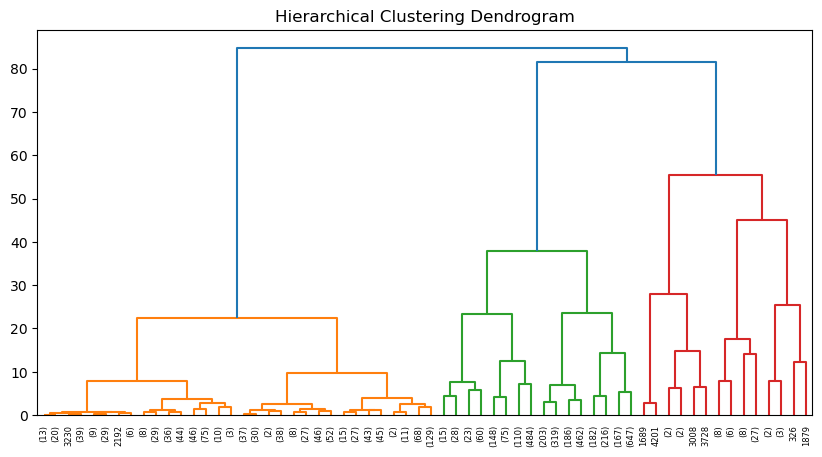

In [46]:
linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(linked, truncate_mode="level", p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()

<a id="read"></a>
# <p style="background-color:red ; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;"> DBSCAN CLUSTERING </p>


In [48]:
# ============================
# 7. DBSCAN Clustering (fixed)
# ============================
dbscan = DBSCAN(eps=1.5, min_samples=5)  # <-- tune eps & min_samples
labels_db = dbscan.fit_predict(X_scaled)

# Add column safely
rfm["DBSCAN_Cluster"] = labels_db

# Check cluster composition
print("DBSCAN cluster counts:", dict(pd.Series(labels_db).value_counts()))

# Compute silhouette score only if valid clusters exist
unique_labels = set(labels_db)
if len(unique_labels) > 1 and (len(unique_labels) > 2 or -1 not in unique_labels):
    sil_dbscan = silhouette_score(X_scaled, labels_db)
    print(f"Silhouette Score (DBSCAN): {sil_dbscan:.3f}")
else:
    print("⚠️ DBSCAN produced only noise or a single cluster – silhouette score not available.")



DBSCAN cluster counts: {0: 4307, -1: 31}
⚠️ DBSCAN produced only noise or a single cluster – silhouette score not available.


<a id="read"></a>
# <p style="background-color:red ; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;"> compare results </p>


In [49]:
print("\nCluster counts:")
print("KMeans:", rfm["KMeans_Cluster"].value_counts().to_dict())
print("Hierarchical:", rfm["Hier_Cluster"].value_counts().to_dict())
print("DBSCAN:", rfm["DBSCAN_Cluster"].value_counts().to_dict())


Cluster counts:
KMeans: {0: 3054, 1: 1067, 3: 204, 2: 13}
Hierarchical: {2: 3325, 3: 949, 0: 56, 1: 8}
DBSCAN: {0: 4307, -1: 31}


<a id="read"></a>
# <p style="background-color:red ; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">save the model for further use .</p>


In [50]:
import joblib

# Save the trained model
joblib.dump(clf, "customer_segmentation_model.pkl")
print("✅ Model saved as customer_segmentation_model.pkl")

✅ Model saved as customer_segmentation_model.pkl


In [51]:
# Save the scaler too (important for future predictions)
joblib.dump(scaler, "rfm_scaler.pkl")
print("✅ Scaler saved as rfm_scaler.pkl")

✅ Scaler saved as rfm_scaler.pkl


In [52]:
# Load model and scaler
clf_loaded = joblib.load("customer_segmentation_model.pkl")
scaler_loaded = joblib.load("rfm_scaler.pkl")

In [53]:
## for example

In [54]:
new_customer = pd.DataFrame({
    "Recency": [1],
    "Frequency": [310],
    "Monetary": [334]
})


In [55]:
# Scale features before prediction
new_customer_scaled = scaler_loaded.transform(new_customer)

In [56]:
# Predict segment
predicted_segment = clf_loaded.predict(new_customer_scaled)
print("Predicted Segment for new customer:", predicted_segment[0])

Predicted Segment for new customer: 3


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


<a id="read"></a>
# <p style="background-color:red ; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;"> scatter plot for frequency vs monetary</p>

In [59]:
print(rfm.columns)



Index(['CustomerID', 'Recency', 'Frequency', 'Monetary', 'KMeans_Cluster',
       'Hier_Cluster', 'DBSCAN_Cluster'],
      dtype='object')


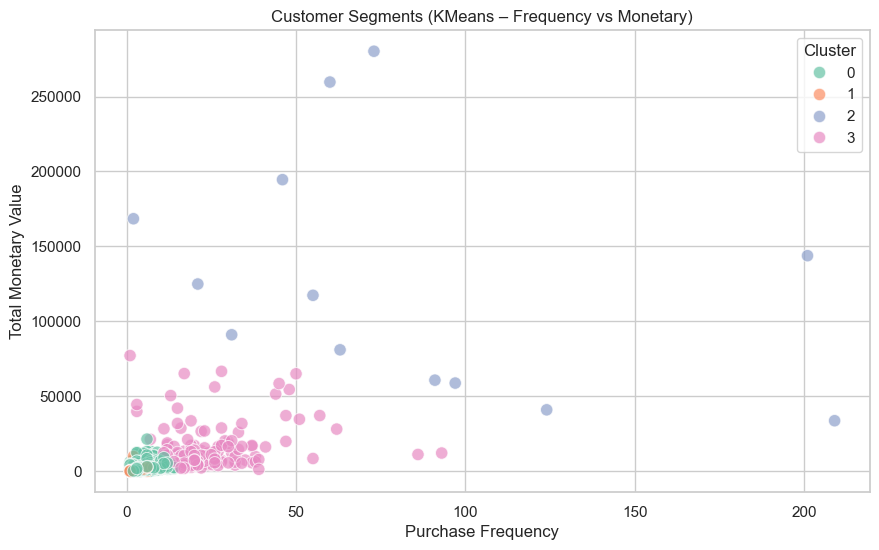

In [60]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=rfm, x="Frequency", y="Monetary", hue="KMeans_Cluster",
    palette="Set2", alpha=0.7, s=80
)
plt.title("Customer Segments (KMeans – Frequency vs Monetary)")
plt.xlabel("Purchase Frequency")
plt.ylabel("Total Monetary Value")
plt.legend(title="Cluster")
plt.show()

<a id="read"></a>
# <p style="background-color:red ; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;"> Scatter plot: Recency vs Monetary</p>


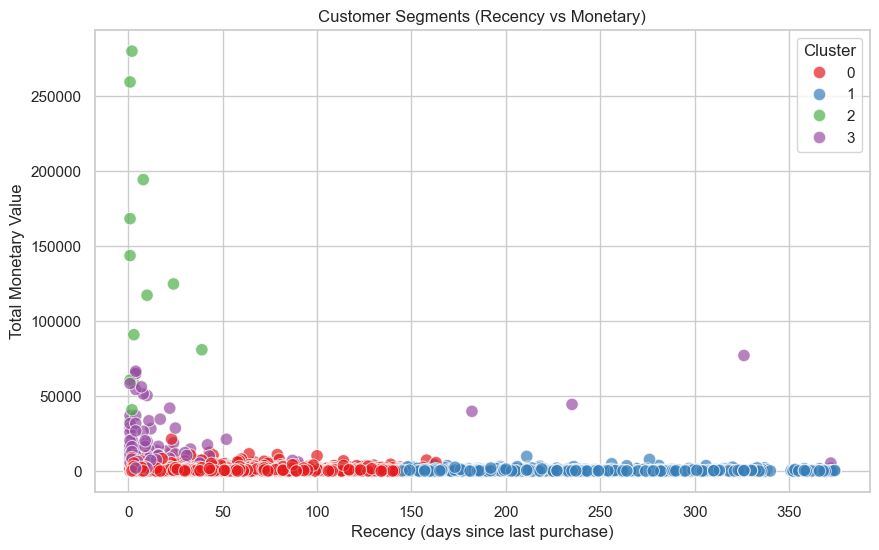

In [61]:

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=rfm, x="Recency", y="Monetary", hue="KMeans_Cluster",
    palette="Set1", alpha=0.7, s=80
)
plt.title("Customer Segments (Recency vs Monetary)")
plt.xlabel("Recency (days since last purchase)")
plt.ylabel("Total Monetary Value")
plt.legend(title="Cluster")
plt.show()

<a id="read"></a>
# <p style="background-color:red ; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Scatter plot: Recency vs Frequency</p>


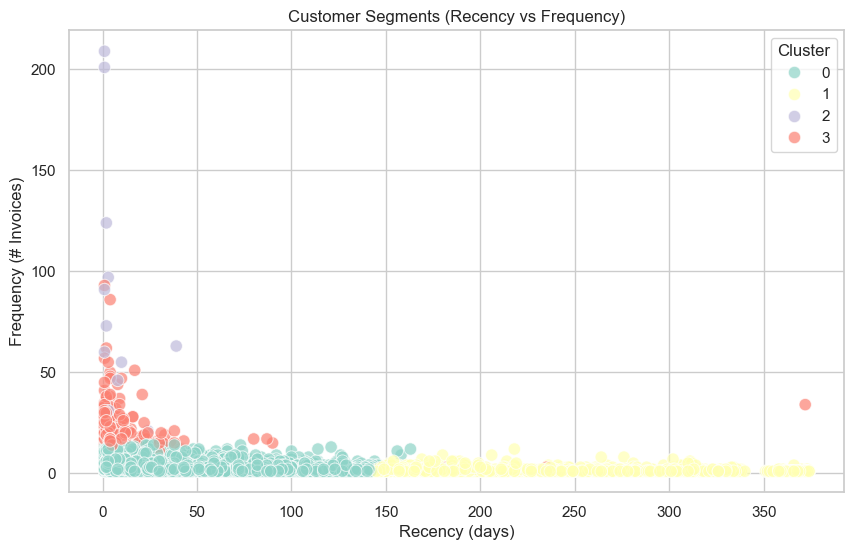

In [62]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=rfm, x="Recency", y="Frequency", hue="KMeans_Cluster",
    palette="Set3", alpha=0.7, s=80
)
plt.title("Customer Segments (Recency vs Frequency)")
plt.xlabel("Recency (days)")
plt.ylabel("Frequency (# Invoices)")
plt.legend(title="Cluster")
plt.show()

<a id="read"></a>
# <p style="background-color:red ; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Compute average RFM per segment</p>

In [64]:

segment_profile = rfm.groupby("KMeans_Cluster").agg({
    "Recency": "mean",
    "Frequency": "mean",
    "Monetary": "mean",
    "CustomerID": "count"
}).rename(columns={"CustomerID": "Num_Customers"}).reset_index()

In [65]:
print("Segment Profile (raw averages):")
print(segment_profile)

Segment Profile (raw averages):
   KMeans_Cluster     Recency  Frequency       Monetary  Num_Customers
0               0   43.702685   3.682711    1359.049284           3054
1               1  248.075914   1.552015     480.617480           1067
2               2    7.384615  82.538462  127338.313846             13
3               3   15.500000  22.333333   12709.090490            204


In [66]:
def label_segment(row, recency_median, freq_median, mon_median):
    if row["Recency"] <= recency_median and row["Frequency"] > freq_median and row["Monetary"] > mon_median:
        return "Champions (High Value Loyal)"
    elif row["Recency"] <= recency_median and row["Frequency"] <= freq_median:
        return "Recent Customers"
    elif row["Recency"] > recency_median and row["Frequency"] > freq_median:
        return "Potential Loyalists"
    elif row["Recency"] > recency_median and row["Monetary"] <= mon_median:
        return "At Risk"
    else:
        return "Churned/Low Value"

In [67]:
# Medians for thresholds
recency_median = rfm["Recency"].median()
freq_median = rfm["Frequency"].median()
mon_median = rfm["Monetary"].median()

In [68]:
segment_profile["Business_Label"] = segment_profile.apply(
    label_segment, axis=1,
    recency_median=recency_median,
    freq_median=freq_median,
    mon_median=mon_median
)

In [70]:
print("\nBusiness-Friendly Segment Profiles:")
print(segment_profile[["KMeans_Cluster", "Num_Customers", "Business_Label"]])


Business-Friendly Segment Profiles:
   KMeans_Cluster  Num_Customers                Business_Label
0               0           3054  Champions (High Value Loyal)
1               1           1067                       At Risk
2               2             13  Champions (High Value Loyal)
3               3            204  Champions (High Value Loyal)


<a id="read"></a>
# <p style="background-color:red ; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;"> --- 1. Bar chart: number of customers per segment ---</p>

C:\Users\Dell\AppData\Local\Temp\ipykernel_21204\1198584322.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="KMeans_Cluster", y="Num_Customers", data=segment_profile, palette="Set2")


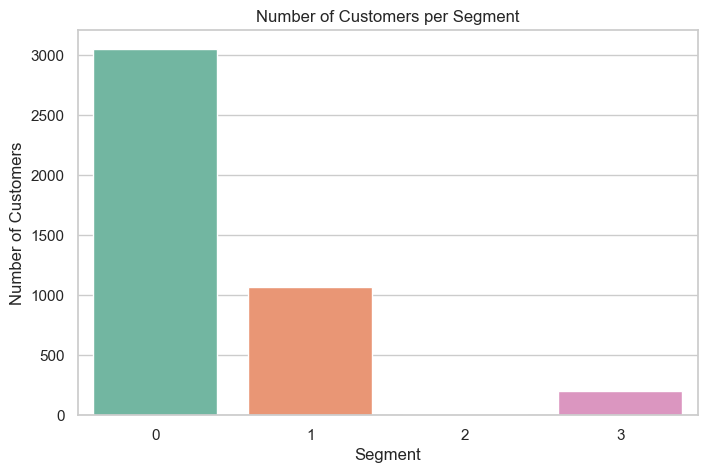

In [71]:

plt.figure(figsize=(8,5))
sns.barplot(x="KMeans_Cluster", y="Num_Customers", data=segment_profile, palette="Set2")
plt.title("Number of Customers per Segment")
plt.xlabel("Segment")
plt.ylabel("Number of Customers")
plt.show()

<a id="read"></a>
# <p style="background-color:red ; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;"> --- 2. Bar chart: average Monetary value per segment ---</p>

C:\Users\Dell\AppData\Local\Temp\ipykernel_21204\4014158169.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="KMeans_Cluster", y="Monetary", data=segment_profile, palette="Set1")


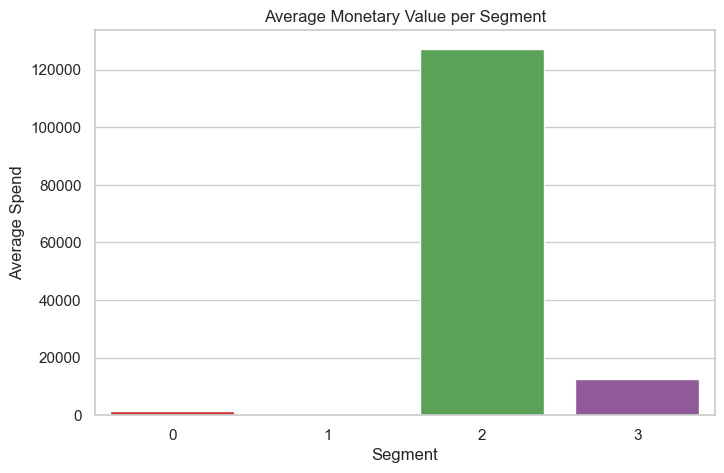

In [72]:

plt.figure(figsize=(8,5))
sns.barplot(x="KMeans_Cluster", y="Monetary", data=segment_profile, palette="Set1")
plt.title("Average Monetary Value per Segment")
plt.xlabel("Segment")
plt.ylabel("Average Spend")
plt.show()


<a id="read"></a>
# <p style="background-color:red ; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">--- 3. Heatmap of RFM averages ---</p>


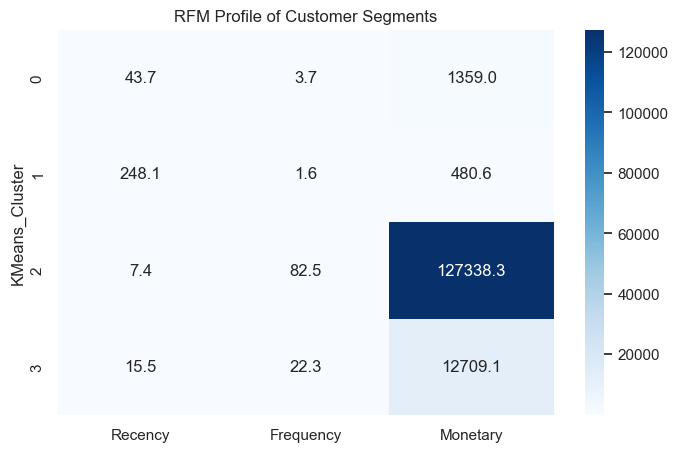

In [73]:

rfm_heatmap = segment_profile.set_index("KMeans_Cluster")[["Recency", "Frequency", "Monetary"]]

plt.figure(figsize=(8,5))
sns.heatmap(rfm_heatmap, annot=True, fmt=".1f", cmap="Blues")
plt.title("RFM Profile of Customer Segments")
plt.show()